In [16]:
# Imports:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

##########################################################################################
# Circuit:

n = 4  # number of qubits

# Quantum Register (qr), with n qubits:
  # By default, each qubit is initialized at |0>
  # 'q' = label for qubits that will later appear in the circuit display:
qr = QuantumRegister(n,'q')

# Quantum Circuit (qc), acting on the qr:
qc = QuantumCircuit(qr)

                           ########## Gates ##########
########## At time t=t_1
#QuantumCircuit.u_3(theta,phi,lambda,qubit), qubit = i^{th} element of the qr = qr[i]:
qc.u3(3/4,0,0,qr[1]); qc.u3(1/4,0,0,qr[3])
# For arrangement:
qc.barrier(qr)

########## At time t=t_2
# QuantumCircuit.C_NOT(control_qubit, target qubit):
qc.cx(qr[1], qr[0]); qc.cx(qr[3], qr[2]); qc.barrier(qr)


########## At time t=t_3  Emulate the dissipation in the phenotypes.
qc.u3(1/4,0,0,qr[0]); qc.u3(1/4,0,0,qr[2])


########## At time t=t_4 Example of parallel computation of CNOT
# S_{ij}= U_{ij}  (U_{Had}^{\otimes 2} U_{ij} U_{Had}^{\otimes 2})  U_{ij} : i=2,j=1.

### U_{21}
qc.cx(qr[2],qr[1])
### U_{12} =  (U_{Had}^{\otimes 2} U_{21} U_{Had}^{\otimes 2})
qc.h(qr[2]); qc.h(qr[1]); qc.cx(qr[2],qr[1]); qc.h(qr[2]); qc.h(qr[1])
### U_{21}
qc.cx(qr[2],qr[1])




##########################################################################################
# In real experiments, measurements are needed to gain information about the state of the system. They cause the system to collapse into classical bits.
    
# Classical Register (cr)  (with n bits):
cr = ClassicalRegister(n, 'bit')
# Measurements (meas)
### meas = QuantumCircuit(QuantumRegister,ClassicalRegister)
meas = QuantumCircuit(qr, cr)
# Put all the measurements at the end, separated from the rest of operations by a wall:
### Measurements.barrier(QuantumRegister)
meas.barrier(qr)
# Map the outcome states obtained by Measurements to the bits in the ClassicalRegister:
### Measurements.measure(QuantumRegister, ClassicalRegister)
meas.measure(qr,cr)

# Circuit = QuantumCircuit + Measurements
circuit = qc + meas
# Circuit Visualization:
### alternatives: circuit.draw()=circuit.draw(output='text'). We will scale the mpl output to 1/2 the normal size:
#circuit.draw(output='mpl', scale=0.5)

# Save the latex source to a file
circuit.draw(output='latex_source', filename='/home/asier/Deskargak/circuit.tex');

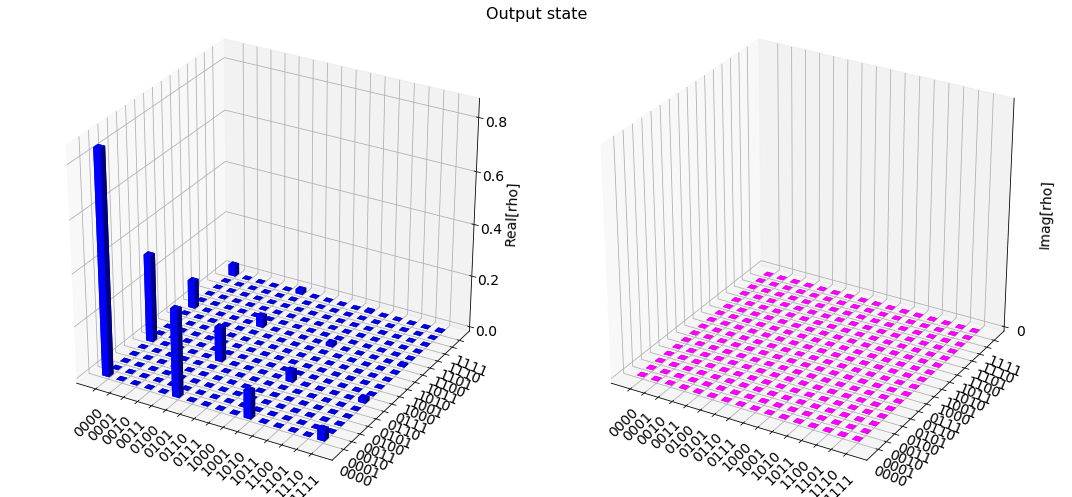

In [12]:
##########################################################################################
# (IDEAL) simulation:

  # IMPORTANT! Qiskit uses an INVERSE ordering!
  # Id est, the 0^{th} qubit is the ket on the RIGHT! 

# Import Qiskit Aer, the package for simulating quantum circuits. 
from qiskit import BasicAer
# Set the (IDEAL) 'statevector_simulator'
simulator = BasicAer.get_backend('statevector_simulator')

# Run the (ideal) quantum circuit.
job = execute(qc, simulator, shots=1024)
result = job.result()
outputstate = result.get_statevector(qc)

# Plot quantum states:

# Imports for plots:
# 'plot_state_city': plots the real and imaginary parts of the state like a city.
# 'plot_state_hinton': top view of 'city' 
# 'plot_state_qsphere': Plots the amplitude and phase of the state vector in a spherical ball. 
##### The amplitude is the thickness of the arrow and the phase is the color.
##### For mixed states, it shows different 'qsphere's for each component.
# 'plot_state_paulivec': Density operator in the basis of Pauli operators.
# 'plot_bloch_multivector': Projects the state onto the single qubit space and plots it on a bloch sphere.
from qiskit.tools.visualization import plot_state_city, plot_state_hinton, plot_state_qsphere
from qiskit.tools.visualization import plot_state_paulivec, plot_bloch_multivector


# Run the (IDEAL) quantum circuit 
result = execute(qc, simulator).result()
outputstate  = result.get_statevector(qc)

# Plots:
plot_state_city(outputstate, title="Output state", color=['blue', 'magenta'], figsize=(15,7))
#plot_state_hinton(outputstate, title="Output state", figsize=(7,7))
#plot_state_qsphere(outputstate, figsize=(5,5))
#plot_state_paulivec(outputstate, title="Output state", color=['purple', 'orange', 'green'], figsize=(10,7))
#plot_bloch_multivector(outputstate, title='Output bloch spheres', figsize=(10,10))

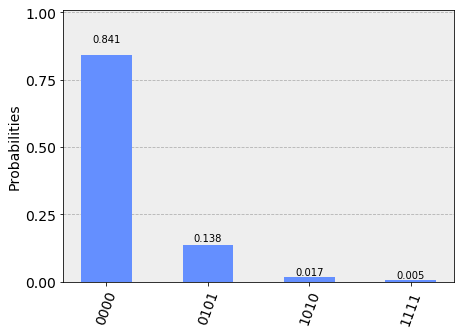

In [13]:
##########################################################################################
# To simulate NON-ideal circuits with Measurements, we use the 'qasm_simulator':
simulator_meas = BasicAer.get_backend('qasm_simulator')

# Run the circuit (via the'execute' function):
 # 'shots' specifies the number of circuit runs used in order to calculate the probability of measuring a certain output state. shots=1024 is the default.
job_meas = execute(circuit, simulator_meas, shots=1024)
# Result:
 # Since it is a NON-ideal circuit, the results differ from the estimated probabilities.
result_meas = job_meas.result()
counts = result_meas.get_counts(circuit)
# Plot:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)